In [23]:
import gzip
from collections import defaultdict

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from Bio import SeqIO
import tqdm

In [6]:
# read genera

#     196 Archaea
#    3740 Bacteria
#    5183 Eukaryota

columns = ['taxa_path', 'tax_slv_id', 'rank', 'unk', 'released']
df = pd.read_csv("./silva/genera.txt", sep="\t", names=columns, header=None).iloc[:, :2]
df['genus'] = df['taxa_path'].apply(lambda x: x.split(';')[-2])
df = df[df.genus != 'uncultured']
df

,taxa_path,tax_slv_id,genus
0,Archaea;Aenigmarchaeota;Aenigmarchaeia;Aenigma...,42915,Candidatus Aenigmarchaeum
1,Archaea;Altiarchaeota;Altiarchaeia;Altiarchaea...,42918,Candidatus Altiarchaeum
2,Archaea;Crenarchaeota;Methanomethylicia;Methan...,42926,Candidatus Methanomethylicus
3,Archaea;Crenarchaeota;Nitrososphaeria;Caldiarc...,42930,Candidatus Caldiarchaeum
4,Archaea;Crenarchaeota;Nitrososphaeria;Nitrosoc...,42937,Candidatus Nitrosocaldus
...,...,...,...
9113,Eukaryota;SAR;Stramenopiles;Peronosporomycetes...,10100,Saprolegnia
9114,Eukaryota;SAR;Stramenopiles;Peronosporomycetes...,10101,Sapromyces
9116,Eukaryota;SAR;Stramenopiles;Placididea;Placidia;,10104,Placidia
9117,Eukaryota;SAR;Stramenopiles;Placididea;Suigets...,14972,Suigetsumonas


In [7]:
set_of_genus = set(df.genus.values)

In [10]:
data = defaultdict(list)

show = False
nseqs_with_genus = 0
nseqs_with_genus_wo_species = 0
nseqs_wo_genus = 0
nseqs_other = 0

headers_with_genus = open('ref.headers.with_genus', 'w')
headers_wo_genus = open('ref.headers.wo_genus', 'w')
headers_other = open('ref.headers.other', 'w')

with open('./ref.headers') as fin:
    for line in tqdm.tqdm(fin, total=2224740):
        taxa_path = " ".join(line.strip().split(' ')[1:])
        acc = line.strip().split(' ')[0].split('.')[0].lstrip('>')
        taxa_path_lst = taxa_path.split(';')
        taxa_path_set = set(taxa_path_lst)
        species = taxa_path_lst[-1]
        genus = taxa_path_lst[-2]

        if genus in set_of_genus:
            nseqs_with_genus += 1
            headers_with_genus.write(line)

            if not species.startswith(genus):
                nseqs_with_genus_wo_species += 1

        elif 'Mitochondria'  in taxa_path_set \
            or 'Chloroplast' in taxa_path_set \
                or 'Metazoa' in taxa_path_set:
            
            nseqs_other += 1
            headers_other.write(line)
        else:
            nseqs_wo_genus += 1
            headers_wo_genus.write(line)

            if show:
                print(f"{acc} {taxa_path}")
            
            # if nseqs_wo_genus > 100:
            #     break

headers_with_genus.close()
headers_wo_genus.close()
headers_other.close()

nseqs_with_genus, nseqs_wo_genus, nseqs_other, nseqs_with_genus_wo_species

  0%|          | 0/2224740 [00:00<?, ?it/s]

100%|██████████| 2224740/2224740 [00:05<00:00, 407220.29it/s]


(1828970, 309890, 85880, 1312367)

In [17]:
309890 + 85880

395770

In [10]:
data = []


with open('./silva/ref.headers.with_genus') as fin:
    for line in tqdm.tqdm(fin, total=1828970):
        taxa_path = " ".join(line.strip().split(' ')[1:])
        acc = line.strip().split(' ')[0].split('.')[0].lstrip('>')
        taxa_path_lst = taxa_path.split(';')
        taxa_path_set = set(taxa_path_lst)
        species = taxa_path_lst[-1]
        genus = taxa_path_lst[-2]
        domain = taxa_path_lst[0]

        data.append([acc, genus, domain])

100%|██████████| 1828970/1828970 [00:05<00:00, 305684.96it/s]


In [11]:
df_genus_acc = pd.DataFrame(data, columns=['acc', 'genus', 'domain'])
df_genus_acc

,acc,genus,domain
0,BD359735,Plasmodium,Eukaryota
1,HL196872,Thraustochytrium,Eukaryota
2,FW343016,Atopostipes,Bacteria
3,FW369114,Bradyrhizobium,Bacteria
4,AY846372,Ankistrodesmus,Eukaryota
...,...,...,...
1828965,CRDG01000005,Streptococcus,Bacteria
1828966,CRDV01000071,Streptococcus,Bacteria
1828967,CRVJ01000043,Streptococcus,Bacteria
1828968,CRRV01000010,Streptococcus,Bacteria


In [12]:
df_genus_acc.domain.value_counts()

Bacteria     1702086
Eukaryota      89194
Archaea        37690
Name: domain, dtype: int64

In [34]:
genus_abund = df_genus_acc.genus.value_counts()
genus_abund.head(30)

Staphylococcus                                        140858
Streptococcus                                          75361
Corynebacterium                                        68023
Bacillus                                               67032
Cutibacterium                                          60377
Pseudomonas                                            53933
Bacteroides                                            38678
Escherichia-Shigella                                   34831
Streptomyces                                           23042
Acinetobacter                                          22909
Enterococcus                                           15539
WCHB1-32                                               15528
Klebsiella                                             15270
Burkholderia-Caballeronia-Paraburkholderia             14767
Salmonella                                             13712
Vibrio                                                 13551
Mycobacterium           

In [30]:
genus_abund.describe()

count      8732.000000
mean        209.456024
std        2385.358122
min           1.000000
25%           2.000000
50%           7.000000
75%          40.000000
max      140858.000000
Name: genus, dtype: float64

In [21]:
_x = []
_y = []
for i in range(51):
    _x.append(i)
    _y.append(genus_abund[genus_abund > i].shape[0])

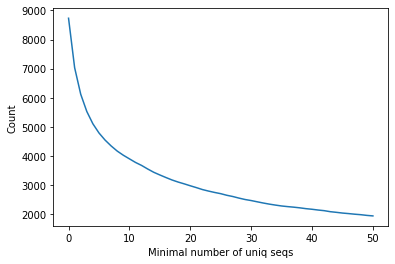

In [26]:
plt.plot(_x, _y)
plt.xlabel('Minimal number of uniq seqs')
plt.ylabel('Count')
plt.show()

<AxesSubplot:>

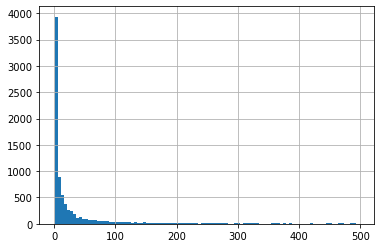

In [38]:
genus_abund[genus_abund < 500].hist(bins=100)

## Sample genera sequences from fasta

In [47]:
data = defaultdict(list)

show = False
i = 0
with gzip.open("./silva/SILVA_138.1_SSURef_tax_silva_full_align_trunc.fasta.gz", "rt") as handle:
    for record in tqdm.tqdm(SeqIO.parse(handle, "fasta")):
        taxa_path = " ".join(record.description.split(' ')[1:])
        taxa_path_lst = taxa_path.split(';')
        species = taxa_path_lst[-1]
        genus = taxa_path_lst[-2]

        # if not species.startswith(genus):
        if genus not in set_of_genus \
            and 'Mitochondria' not in taxa_path \
                and 'Chloroplast' not in taxa_path:
            
            i += 1

            if show:
                # Access the record attributes
                print("ID:", record.id)
                # print("Sequence:", record.seq)
                print("Description:", record.description)
                print("Length:", len(record))
                print("---")
            
            # if i > 20:
            #     break

205237it [01:01, 3329.39it/s]


KeyboardInterrupt: 

In [12]:
taxa_path = " ".join(record.description.split(' ')[1:])

In [13]:
taxa_path

'Eukaryota;SAR;Alveolata;Apicomplexa;Aconoidasida;Haemosporoidia;Plasmodium;Plasmodium malariae'